# Parkinson's Dataset

##### Report by Ben Wilson

## Introduction

##### Parkinson's Disease is a neurodegenerative disease that is typically diagnosed in older populations. Common symptoms include rigidity, decreased movement (this is called bradykinesia), tremors, issues with speech, irregular sleep, and the development of poorer posture. Risk factors for Parkinsons's are primarily hereditary (family history of the disorder) and environmental (exposure to certain pesticides or other harmful chemicals that have been linked to the diease). Males and older populations are more likely to develop Parkinson's than other populations. Potential ways that have been linked to a decreased chance to devleop Parkinson's include physical exercise and caffeine consumption.

## Methods

##### This project employed the use of Visual Studio Code and the Python programming language to explore a dataset converted to a CSV format. This data was used to conduct exploratory data analysis, produce visualizations, and perform statistical tests. First, the necessary packages were loaded into VS Code. Next, the dataset was imported into the same file as this notebook. A sanity check was included for the purposes of outlining the relevant columns.

##### After the data was loaded, common standard statistics were calculated to get a better sense of the data. Afterward, numerous continegency tables were created to compare frequnecies of certain variables stacked against a Parkinson's diagnosis. The next section saw the use of data visualizations including scatterpots, box-and-whisker plots, violin plots, and linear regression models. Finally, statistical tests were performed, primarily the Pearson correlation test.

## Results

### Dataset

In [3]:
import pandas as pd
from scipy import stats
import seaborn
from matplotlib import pyplot

In [4]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [5]:
%config InlineBackend.figure_format = 'retina'
seaborn.set_style(style='whitegrid')

##### First, we have to install the packages required for our code to work and customize our visualizations. Next, let's load the dataset.

In [6]:
parkinsons = pd.read_csv('parkinsons_disease_data.csv')
parkinsons.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

##### There are a few column headings that are unfamiliar to the borader public. UPDRS stands for Unified Parkinson's Disease Rating Scale, MoCA stands for Montreal Cognitive Assessment, and SystolicBP stands for Systolic Blood Pressure.

In [7]:
parkinsons.shape

(2105, 35)

##### In this dataset, there are 35 columns and 2105 rows. Many of the columns concern demographic information, such as education, age, gender, ethnicity. Others make note of potential risk factors and health-related matters for the patients, such as BMI, smoking habits, alocholo consumption, diet quality, and physical acitivty. Another main group of columns is comorbity, such as depression, diabetes, stroke, hypertension, and traumatic brain injuriies. Lastly, another group follows symptoms of the disease, such as speech problems, tremors, rigidity, bradykinesia, postural instability, and sleep disorders.

## Exploratory Data Analysis

In [8]:
parkinsons.Diagnosis.value_counts(normalize=True) * 100

Diagnosis
1    61.947743
0    38.052257
Name: proportion, dtype: float64

##### Around 62% of the participants in this dataset have been diagnoses with Parkinson's Disease.

In [9]:
parkinsons.groupby('Diagnosis').CholesterolTotal.mean()

Diagnosis
0    227.917357
1    226.211859
Name: CholesterolTotal, dtype: float64

##### The means for both groups are relatively similar, suggesting there is no significant difference in the averages of both groups.

In [10]:
parkinsons.groupby('Diagnosis').AlcoholConsumption.mean()

Diagnosis
0     9.774184
1    10.203948
Name: AlcoholConsumption, dtype: float64

In [11]:
parkinsons.groupby('Diagnosis').Smoking.mean()

Diagnosis
0    0.293383
1    0.298313
Name: Smoking, dtype: float64

In [12]:
parkinsons.groupby('Diagnosis').Age.mean()

Diagnosis
0    68.635456
1    70.195552
Name: Age, dtype: float64

##### As shown before, it appears there is no siginficant difference between the means of these groups when separated by a Parkinson's diagnosis. This suggests a diagnosis of Parkinson's Disease has little bearing on evaluations like alcohol consumption, smoking habits, and age.

In [13]:
pd.crosstab(parkinsons.Tremor, parkinsons.Diagnosis)

Diagnosis,0,1
Tremor,,
0,594,602
1,207,702


In [14]:
pd.crosstab(parkinsons.Rigidity, parkinsons.Diagnosis)

Diagnosis,0,1
Rigidity,,
0,681,892
1,120,412


In [15]:
pd.crosstab(parkinsons.SpeechProblems, parkinsons.Diagnosis)

Diagnosis,0,1
SpeechProblems,,
0,559,925
1,242,379


In [16]:
pd.crosstab(parkinsons.Bradykinesia, parkinsons.Diagnosis)

Diagnosis,0,1
Bradykinesia,,
0,711,957
1,90,347


In [17]:
pd.crosstab(parkinsons.Gender, parkinsons.Diagnosis)

Diagnosis,0,1
Gender,,
0,415,653
1,386,651


## Data Visualization

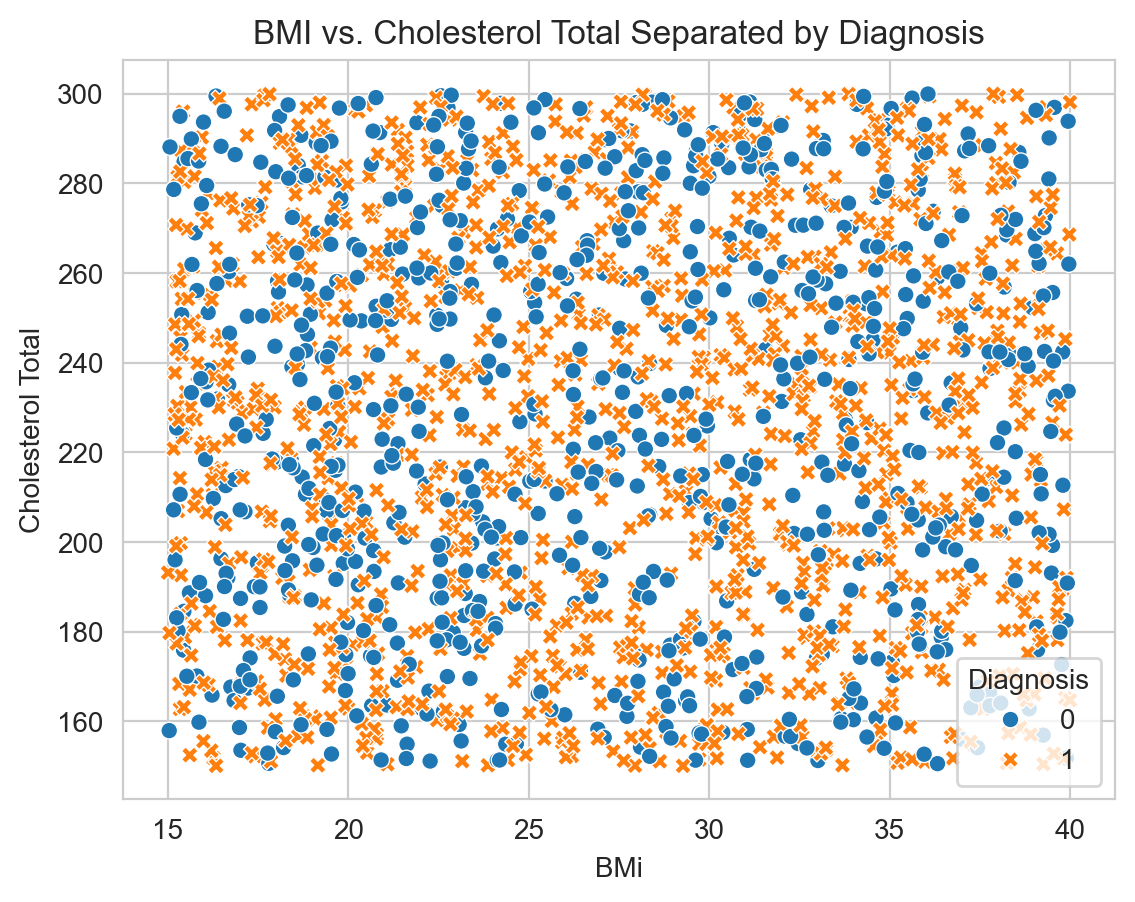

In [18]:
seaborn.scatterplot(
    data=parkinsons,
    x='BMI',
    y='CholesterolTotal',
    hue='Diagnosis',
    style='Diagnosis'
).set(
    title='BMI vs. Cholesterol Total Separated by Diagnosis',
    xlabel='BMi',
    ylabel='Cholesterol Total'
);

##### The data in this scatterplot is very noisy with no clear trend. Instead, it may prove more fruitful to compare cholesterol and a Parkinson's diagnosis using a box-and-whisker plot.

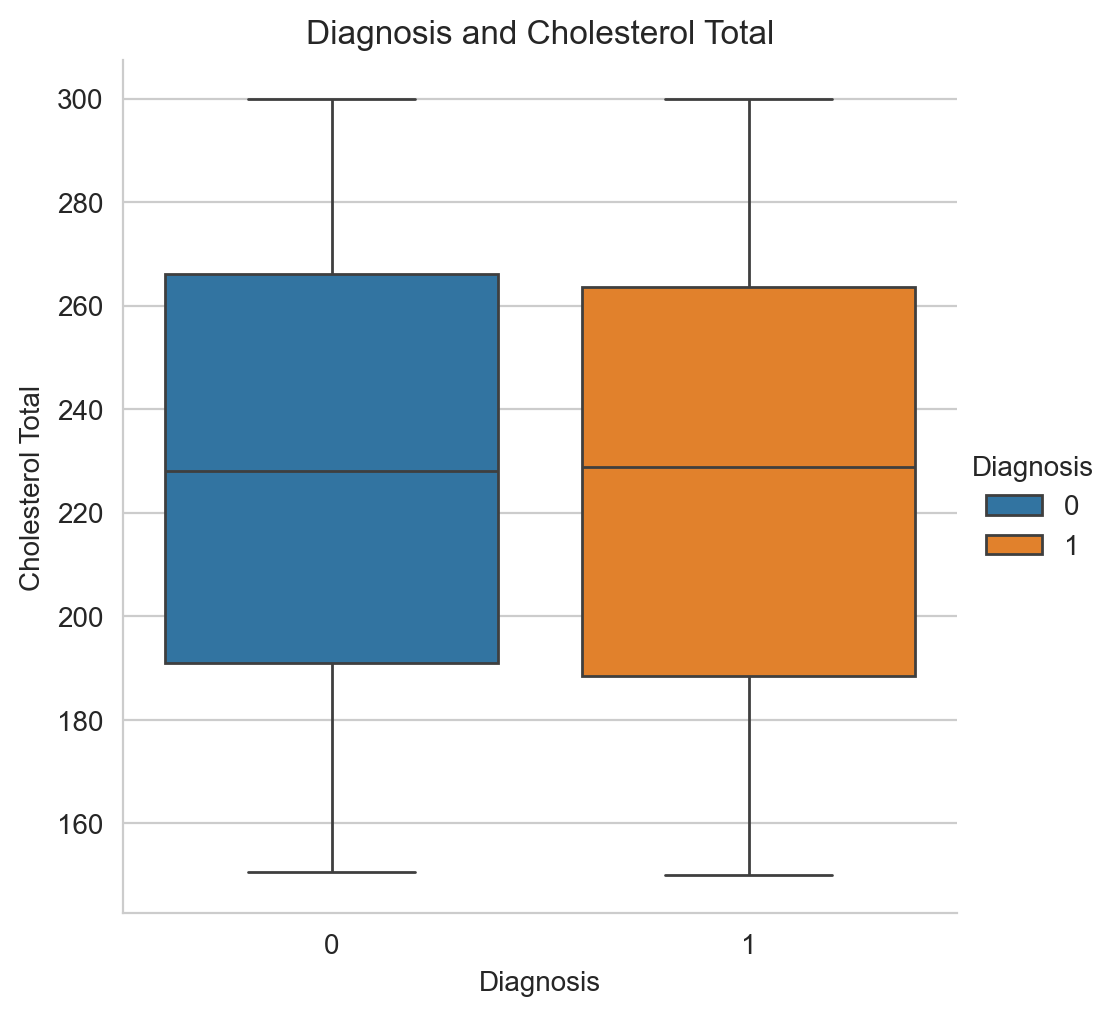

In [20]:
seaborn.catplot(
    data=parkinsons,
    x='Diagnosis',
    y='CholesterolTotal',
    hue='Diagnosis',
    kind='box'
).set(
    title='Diagnosis and Cholesterol Total',
    xlabel='Diagnosis',
    ylabel='Cholesterol Total'
);

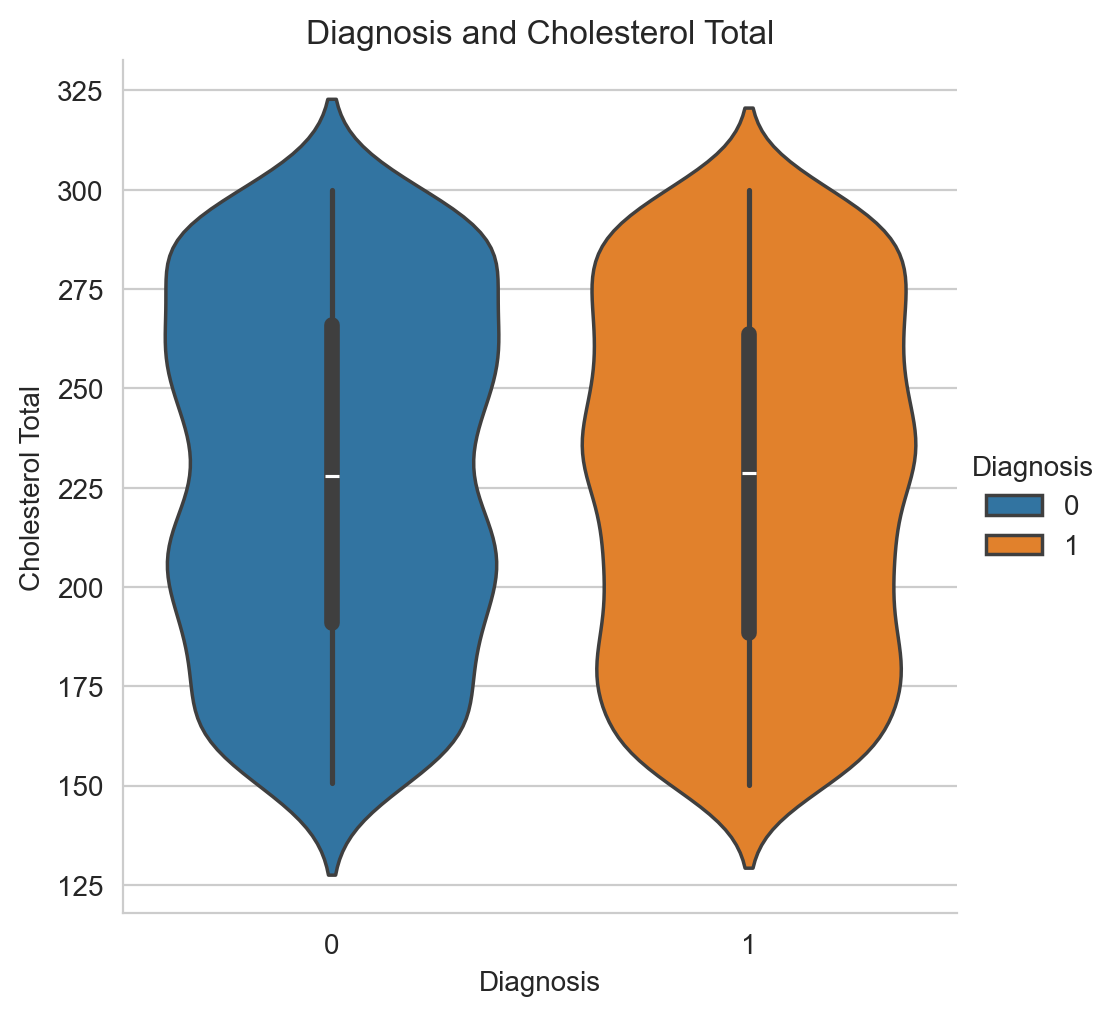

In [21]:
seaborn.catplot(
    data=parkinsons,
    x='Diagnosis',
    y='CholesterolTotal',
    hue='Diagnosis',
    kind='violin'
).set(
    title='Diagnosis and Cholesterol Total',
    xlabel='Diagnosis',
    ylabel='Cholesterol Total'
);

##### Based on this visualization, it appears that there is no significant difference in cholesterol between those who have been diagnosed with Parkinson's and those who have not. This contrasts some of the research in the introduction.

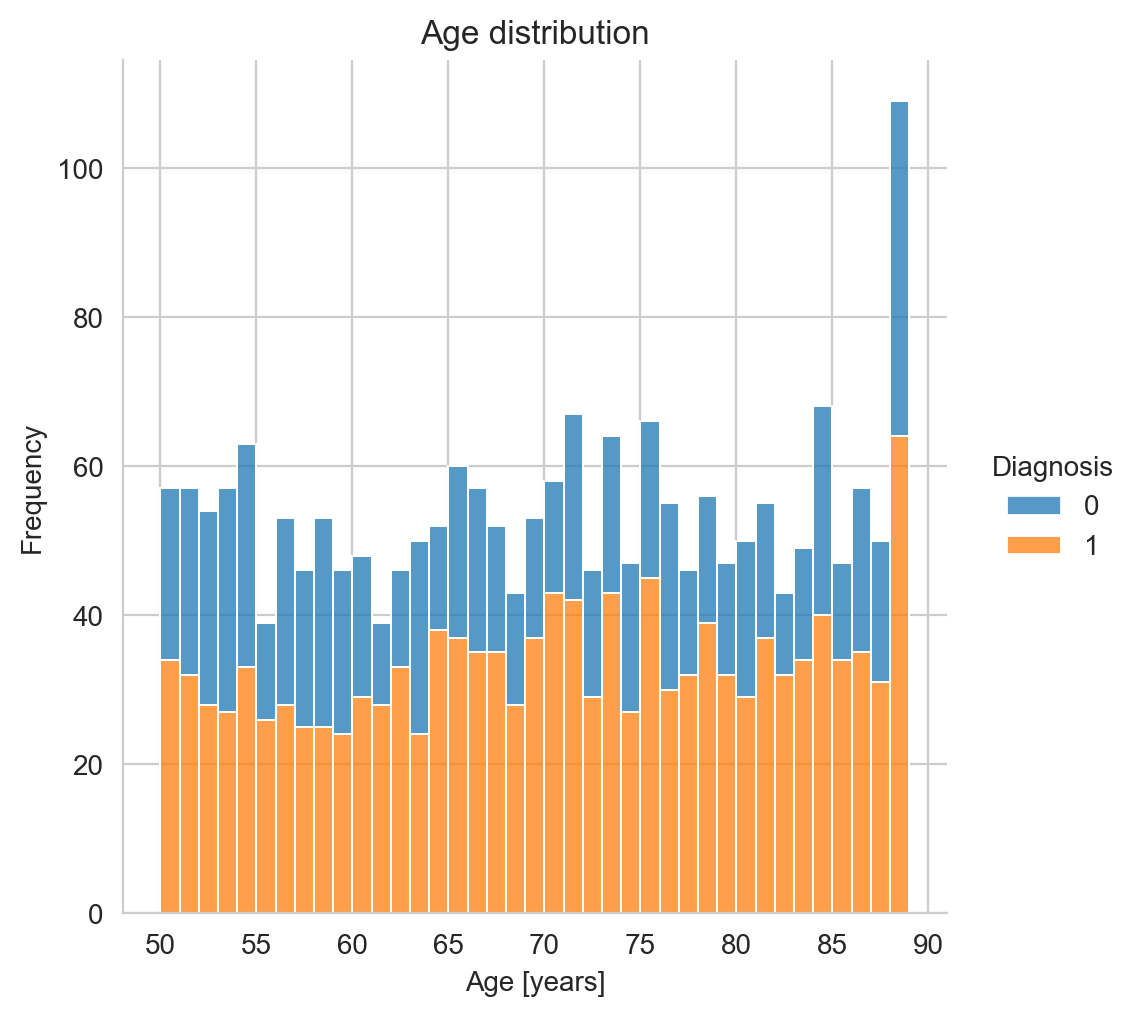

In [43]:
seaborn.displot(
    parkinsons,
    x='Age',
    hue='Diagnosis',
    bins=range(50, 90, 1),
    multiple='stack'
).set(
    title='Age distribution',
    xlabel='Age [years]',
    ylabel='Frequency'
);

##### This histogram displays relatively level proportions of age untill 88, where the plot seemingly spikes.

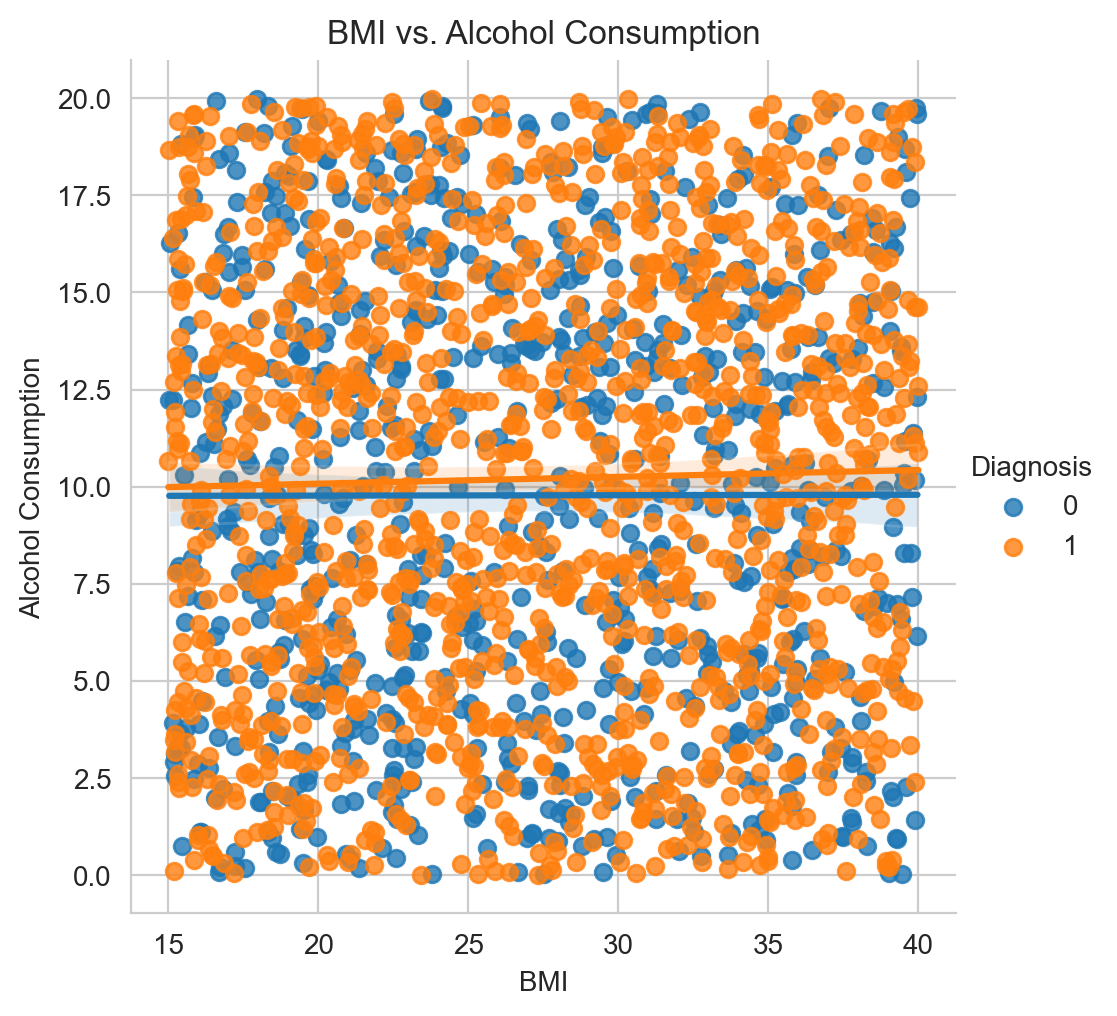

In [25]:
# Plot a linear regession model between BMI and Alcohol Consumption spearated by Diagnosis
seaborn.lmplot(
    data=parkinsons,
    x='BMI',
    y='AlcoholConsumption',
    hue='Diagnosis'
).set(
    title='BMI vs. Alcohol Consumption',
    xlabel='BMI',
    ylabel='Alcohol Consumption'
);

##### Like the scatterplot before, the linear regression model is not very helpful. There appears to be very little correlation between BMI and alcohol consumption as evidenced by the near-horizontal trendlines. This can be confirmed by checking the model values themselves. This moves us into the next section: statistical analyses.

### Statistical Analyses

In [ ]:
# Calculate the correlation between BMI and Alcohol Consumption
parkinsons[['BMI', 'AlcoholConsumption']].corr(method='pearson')

,BMI,AlcoholConsumption
BMI,1.000000,0.015542
AlcoholConsumption,0.015542,1.000000


##### This very low value suggests no signficant correlation between BMI and Alcohol Consumption.

In [31]:
# Calculate the correlation between BMI and Physical Actvity
parkinsons[['BMI', 'PhysicalActivity']].corr(method='pearson')

,BMI,PhysicalActivity
BMI,1.000000,-0.003622
PhysicalActivity,-0.003622,1.000000


In [33]:
# Calculate the correlation between BMI and Cholesterol Total
parkinsons[['BMI', 'CholesterolTotal']].corr(method='pearson')

,BMI,CholesterolTotal
BMI,1.000000,0.010158
CholesterolTotal,0.010158,1.000000


##### These low values again suggest little correlation between these variables.

## Conclusion

##### Currently, this dataset has many hurdles to overcome in order to produce more significant analysis and visualizations. The visualizations currently appear muddled due to the large observation size and numerous binary variables. Many of the trends in this report do not match traditionally understood facts about Parkinson's Disease. More analysis will be required to learn more about this dataset. Many assumptions for statistical tests (normality, equal variances, etc.) were not confirmed to have been met, meaning parametric tests were not used. Hopefully, this dataset can be revisted after the student posseses more tools and a better framework.

## Works Cited

##### 
1. https://www.mayoclinic.org/diseases-conditions/parkinsons-disease/symptoms-causes/syc-20376055
2. https://www.movementdisorders.org/MDS/MDS-Rating-Scales/MDS-Unified-Parkinsons-Disease-Rating-Scale-MDS-UPDRS.htm